### Define Data Quality KPIs

**Task 1**: Identify Relevant KPIs

**Objective**: Develop KPIs that align with organizational goals.

**Steps**:
1. Choose a dataset from a domain of your interest (e.g., sales data, healthcare records, or transaction logs).
2. Identify three KPIs that would be crucial for assessing the data quality in your chosen dataset. Consider accuracy, completeness, and timeliness.
3. Document why each KPI is important for maintaining high-quality data in your given context.

In [1]:
# Write your code from here
import pandas as pd
from datetime import timedelta

# Sample DataFrame (replace this with your actual data)
data = {
    'patient_id': [1, 2, 3, 4],
    'diagnosis_code': ['A01', 'B02', None, 'C03'],
    'medication': ['Med1', 'Med2', 'Med3', None],
    'allergies': ['None', None, 'Peanuts', 'None'],
    'admission_date': pd.to_datetime(['2025-05-01', '2025-05-03', '2025-05-04', '2025-05-05']),
    'entry_date': pd.to_datetime(['2025-05-02', '2025-05-05', '2025-05-06', '2025-05-10'])
}

df = pd.DataFrame(data)

# 1. Accuracy Rate (simple example: percentage of non-null diagnosis_code and medication)
def accuracy_rate(df):
    total_records = len(df)
    correct_records = df.dropna(subset=['diagnosis_code', 'medication']).shape[0]
    return (correct_records / total_records) * 100

# 2. Completeness Percentage (percentage of records with all mandatory fields non-null)
def completeness_percentage(df):
    mandatory_fields = ['patient_id', 'diagnosis_code', 'medication', 'allergies']
    total_records = len(df)
    complete_records = df.dropna(subset=mandatory_fields).shape[0]
    return (complete_records / total_records) * 100

# 3. Timeliness of Data Entry (average days difference between admission and entry date)
def average_timeliness(df):
    df['timeliness'] = (df['entry_date'] - df['admission_date']).dt.days
    return df['timeliness'].mean()

# Calculate KPIs
accuracy = accuracy_rate(df)
completeness = completeness_percentage(df)
timeliness = average_timeliness(df)

print(f"Accuracy Rate: {accuracy:.2f}%")
print(f"Completeness Percentage: {completeness:.2f}%")
print(f"Average Timeliness (days): {timeliness:.2f}")


Accuracy Rate: 50.00%
Completeness Percentage: 25.00%
Average Timeliness (days): 2.50


**Task 2**: Develop a KPI Dashboard

**Objective**: Visualize your KPIs for better monitoring.

**Steps**:
1. Use a tool like Excel or a BI tool (e.g., Tableau, Power BI) to create a simple dashboard.
2. Input sample data and visualize your chosen KPIs, showing how they would be monitored.
3. Share your dashboard with peers and gather feedback on KPI relevance and clarity.

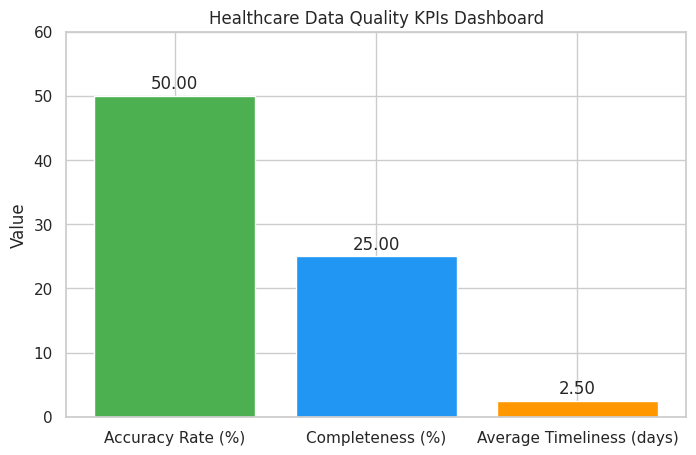

In [2]:
# Write your code from here
import matplotlib.pyplot as plt
import seaborn as sns

# Sample KPI values (from previous example or your actual calculations)
kpis = {
    'Accuracy Rate (%)': accuracy,
    'Completeness (%)': completeness,
    'Average Timeliness (days)': timeliness
}

# Prepare data for plotting
kpi_names = list(kpis.keys())
kpi_values = list(kpis.values())

# Set up the plot style
sns.set(style="whitegrid")

# Create barplot
plt.figure(figsize=(8, 5))
bars = plt.bar(kpi_names, kpi_values, color=['#4CAF50', '#2196F3', '#FF9800'])

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

plt.title("Healthcare Data Quality KPIs Dashboard")
plt.ylim(0, max(kpi_values) + 10)  # Add some space on top
plt.ylabel("Value")
plt.show()
